# Week 11: Frequency Analysis with the DFT

<font size="6"> Laboratory 10 </font> <br>
<font size="3"> Last updated April 1, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

### Mathematics 
- DFT
- IDFT
    
### Programming Skills 
- FFT
- IFFT
    
### Embedded Systems 
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>
- N/A

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Aidan Leib

**Email:** pleib@purdue.edu

## <span style="color:orange;"> 1. Introduction </span>

In a previous lab, we covered how to sample real-time signals and learn the frequency components of the signal using Discrete Fourier Transform (DFT).

Recall that the **DFT** of a discrete-time signal with period $N$, $f_d[n]$ is defined as:

$$ F[k]= \sum_{n=0}^{N-1} f_d[n] e^{-i \frac{2 \pi}{N} k n },  $$

and the specific value of entry $F[k]$  is called the **k-th coefficients of the DFT** of the signal and the  DFT coefficient with the largest magnitude indicates the largest frequency contained in the signal.


DFT is a powerful tool in signal analysis with wide applications like reconstruction of medical images, computational photography, digital compression, noise cancellation in headphones, telecommunication and many more.



## <span style="color:orange;"> 2. Denoising a Signal </span>




Let us consider that you are recording a person playing a piano in a mall using a basic audio recorder. Even if you are standing close to the audio source, it is wise to assume that the audio recorder will pick up the ambient noise and sound of other people in the busy mall. In such a case, we need a way to seperate the background noise from the music in the recording. 

Let us consider a 1 second clip of the performance where the pianist played an $A_1$ (55Hz) and $B_2$ (123Hz) notes. Let us look at what the signal looks like in a perfect environment without any noise by loading [ideal_piano_recording_example.npy](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/signal_analysis/ideal_piano_recording_example.npy).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# the values used during the recording are provided
sampling_rate = 2100
sampling_period = 1/sampling_rate
duration = 1

t = np.arange(0, duration, sampling_period) 


ideal_recording = np.load('ideal_piano_recording_example.npy')

Audio(ideal_recording, rate=sampling_rate)

Now, let us plot and observe the ideal recording in time domain.

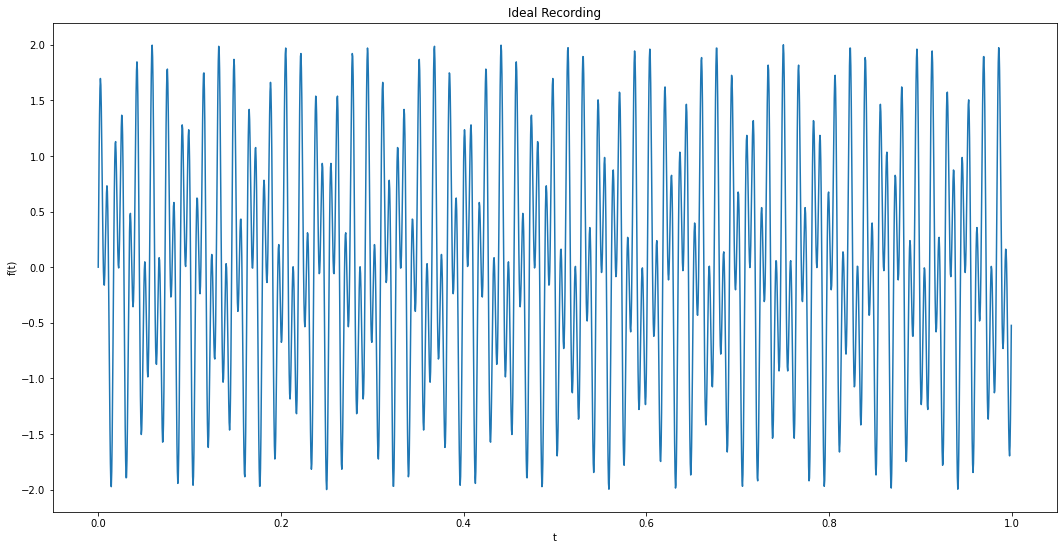

In [2]:
plt.figure(figsize = (18, 9))
plt.plot(t, ideal_recording)
plt.title('Ideal Recording')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

Now let us look at our noisy recording, [noisy_piano_recording_example.npy](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/signal_analysis/noisy_piano_recording_example.npy) and try to recover the original sound from it.

In [3]:

actual_recording = np.load('noisy_piano_recording_example.npy')
Audio(actual_recording, rate=sampling_rate)

As expected, there is a discernible differnce between two audio samples. Now let us plot and visualize this recording.

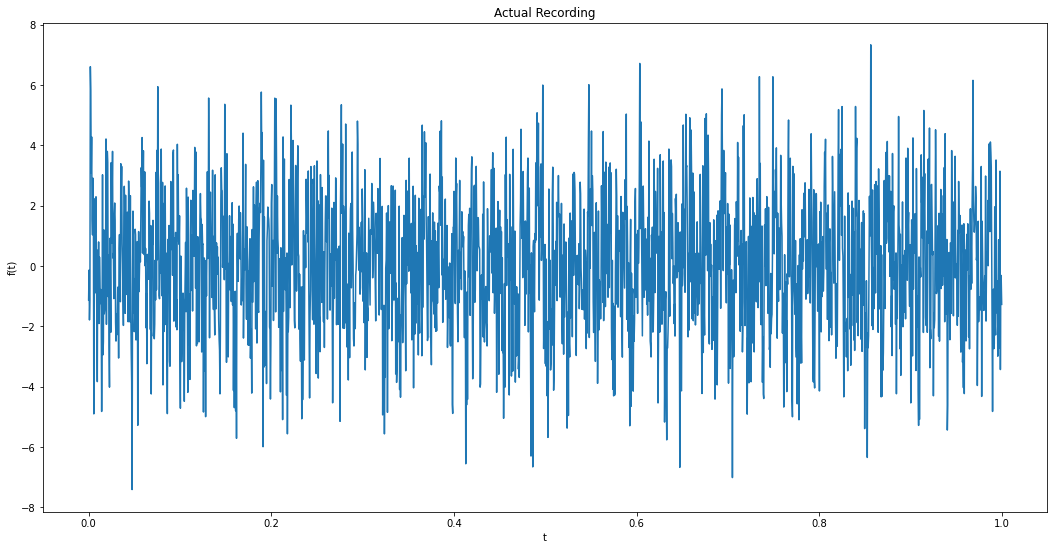

In [4]:
plt.figure(figsize = (18, 9))
plt.plot(t, actual_recording)
plt.title('Actual Recording')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

We can see that the time domain plots of both the signals are not distinguishable. So it is safe to assume that we cannot approximate the original signal from this time domain plot alone. 

Let us see the frequencies contained in the recording by plotting its dft.

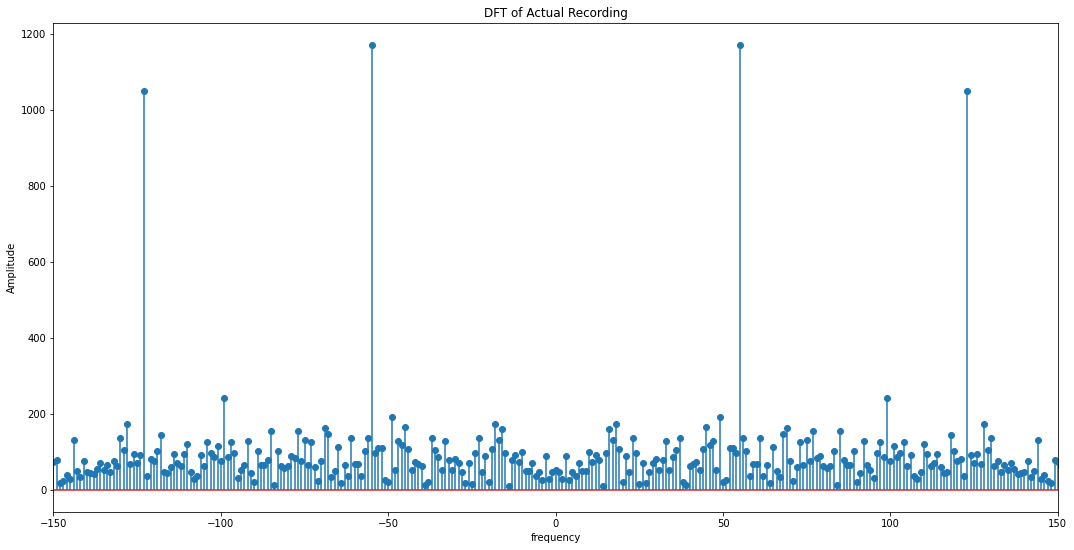

In [5]:
dft = np.fft.fft(actual_recording)
abs_dft = np.abs(dft)
num_samples = len(actual_recording)
xf = np.fft.fftfreq(num_samples, 1/sampling_rate)

plt.figure(figsize = (18, 9))
plt.stem(xf, abs_dft)
plt.xlim(-150, 150)
plt.title('DFT of Actual Recording')
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.show()

This DFT plot gives us an idea about the dominant frequencies in the signal. By looking at the amplitudes, we can identify that the dominant frequencies in the recording are 55Hz and 123Hz. We can conclude with sufficient confidence that the other frequencies may likely be due to the noisy environment as the amplitudes are low for those frequencies. But it may not always be the case.

Now let us filter the noise from our recording and plot its dft.

In [6]:
# the above snippet will return a list, with 1s in indices 
# where amplitude > 300 and 0s in other places.
noise_indices = abs_dft>300

# filter out the amplitude values under 300
dft_clean = noise_indices * dft

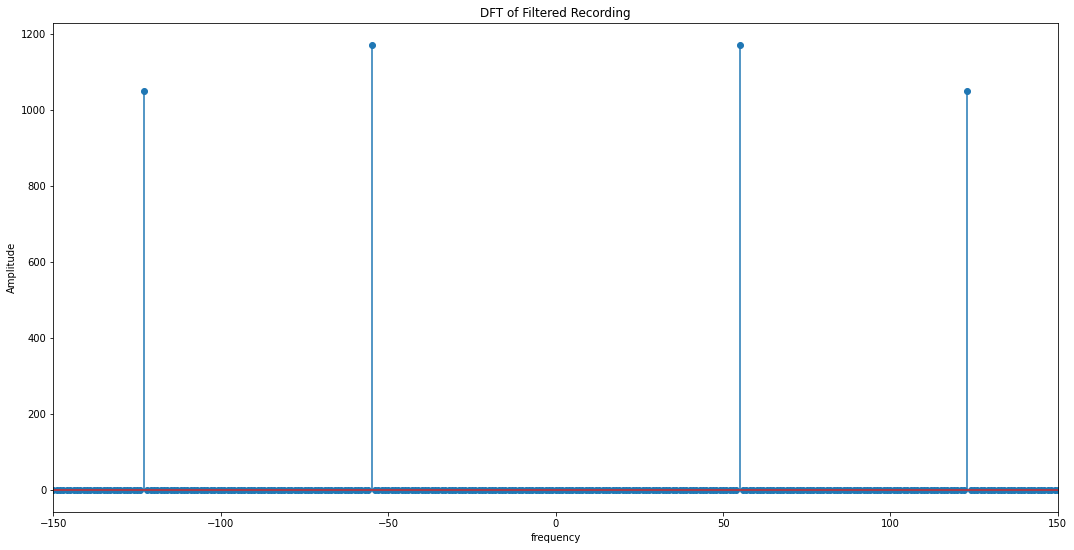

In [7]:

plt.figure(figsize = (18, 9))
plt.stem(xf, np.abs(dft_clean))
plt.xlim(-150, 150)
plt.title('DFT of Filtered Recording')
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.show()

Let us compare this plot with the DFT of the ideal recording without any noise.

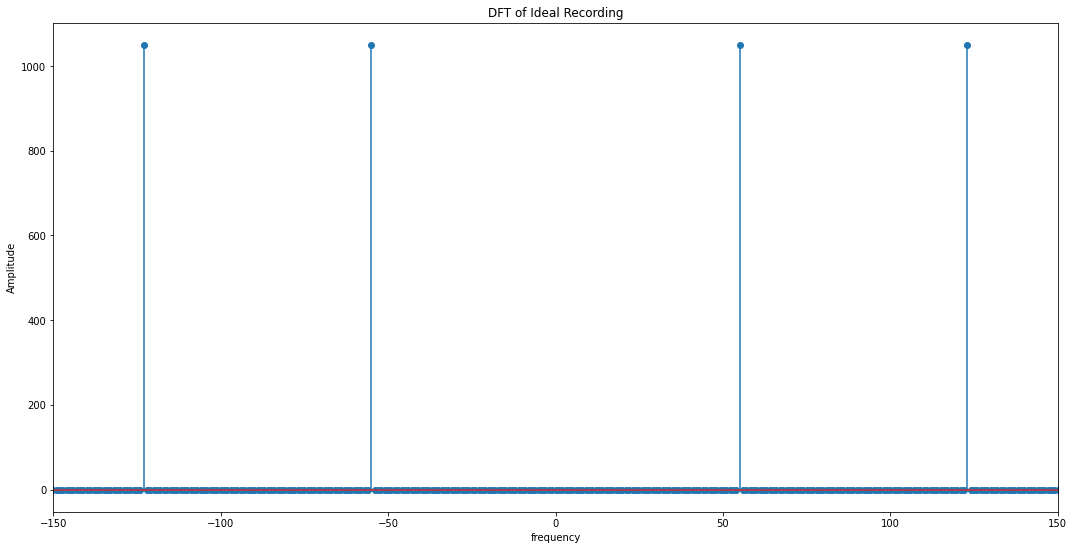

In [8]:

plt.figure(figsize = (18, 9))
plt.stem(xf, np.abs(np.fft.fft(ideal_recording)))
plt.xlim(-150, 150)
plt.title('DFT of Ideal Recording')
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.show()

The filtered signal is identical to the original signal. We can now convert the denoised signal to time domain.

In [10]:
filtered_recording = np.fft.ifft(dft_clean)
Audio(filtered_recording, rate=sampling_rate)

/Users/pal/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


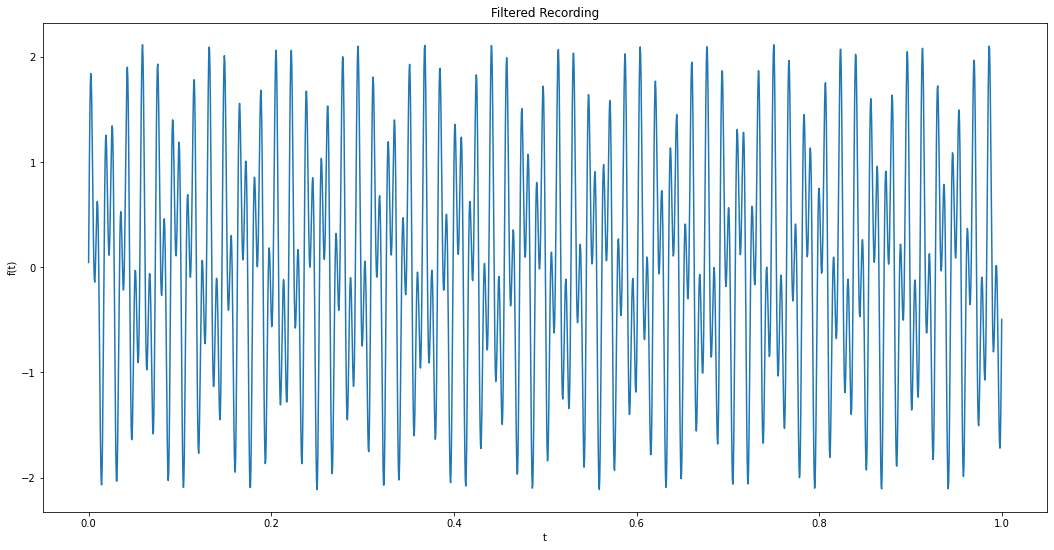

In [12]:
plt.figure(figsize = (18, 9))
plt.plot(t, filtered_recording)
plt.title('Filtered Recording')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

Note: We are clearly able to seperate the noise from the original signal due to the large difference between amplitudes of the frequencies. If the original signal and the ambient noise had the similar amplitude, we wouldnt be able to get a properly filtered signal.

### <span style="color:red"> Exercise 1 </span>
- Build a signal that is a sum of sines of 5 different frequencies. Vary the magnitude of the coefficients so that one is very large compared to the others.
- Play the sound corresponding to this signal.
- Compute the DFT and plot their magnitude. 
- For what value of $k$ is the magnitude of $F[k]$ the largest? Denote this value of $k$ by $k_0$.
- What frequency does the $k_0$ you identified correspond to? Denote that frequency by $f_0$.
- Play the sound which only has the frequency $f_0$. How does it compare to the original sound?

In [64]:
t = np.linspace(0, 1, 44100)
notes = "A A# B C C# D D# E F F# G G#"
frequencies = 440 * 2 ** (np.arange(12) / 12)
waves = [None] * 12
for i, freq in enumerate(frequencies):
    waves[i] = np.sin(2 * np.pi * freq * t)
scale = dict(zip(notes.split(), waves))

signal = 0.8 * scale['A'] + 10 * scale['C#'] + 3 * scale['E'] + 2 * np.sin(0.5 * np.pi * frequencies[0] * 2 * t) + 5 * np.sin(np.pi * frequencies[0] * t)
Audio(signal, rate=44100)

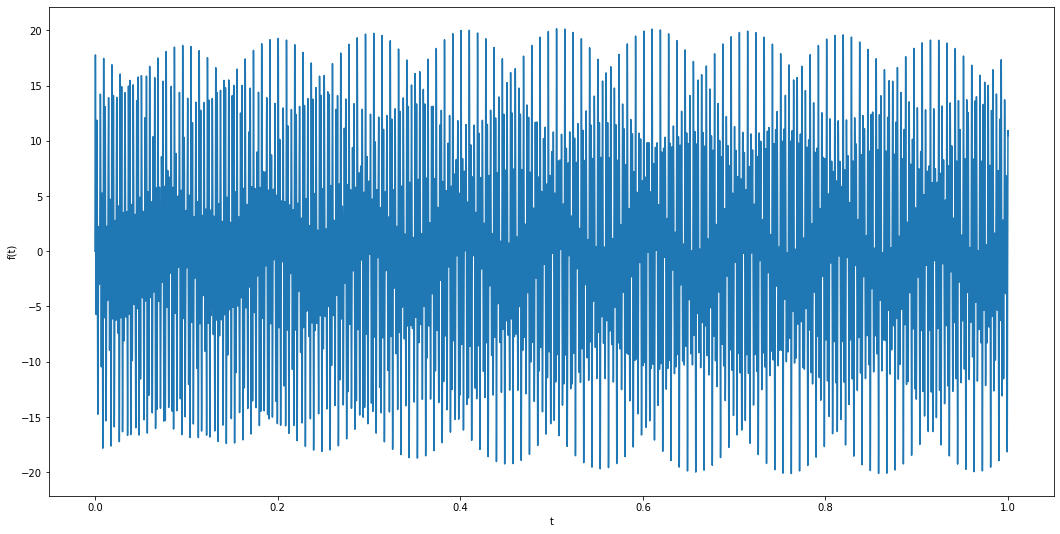

In [65]:
plt.figure(figsize = (18, 9))
plt.plot(t, signal)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

In [108]:
dft = np.fft.fft(signal)
abs_dft = np.abs(dft)
num_samples = len(signal)
xf = np.fft.fftfreq(num_samples, 1/44100)

print(np.where(abs_dft == max(abs_dft)))
print(max(abs_dft))

(array([554]),)
172431.2659071835


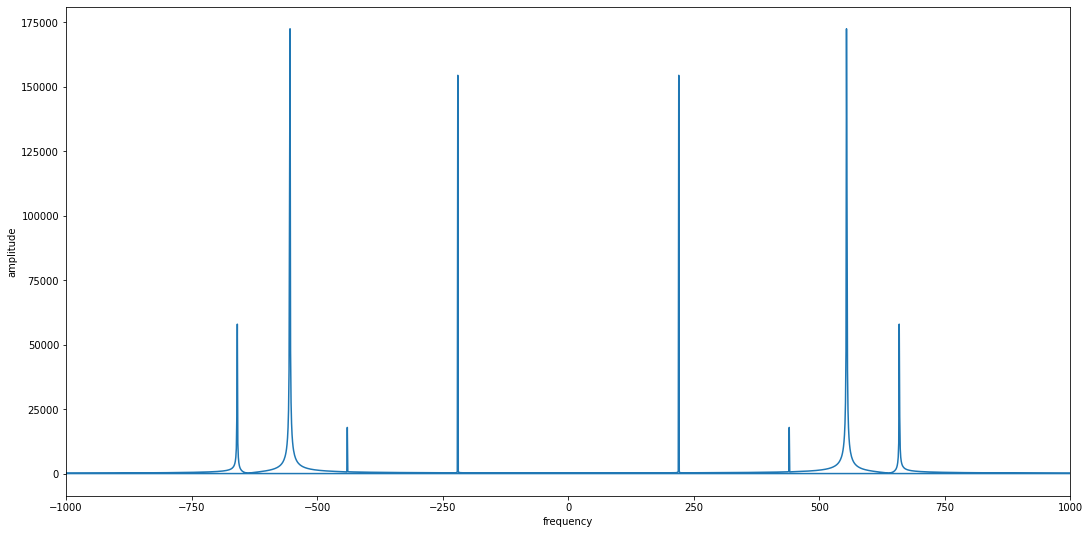

In [67]:
plt.figure(figsize = (18, 9))
plt.plot(xf, abs_dft)
plt.xlim(-1000, 1000)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

$k_0 \approx 554$ and $f_0 \approx 554$Hz

In [80]:
_filter = abs_dft > sorted(abs_dft)[-3]
filtered_signal = np.fft.ifft(signal * _filter)
Audio(filtered_signal, rate=44100)

/Users/pal/Library/Python/3.9/lib/python/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


The filtered frequency is very clear and not lost in the chord.

## <span style="color:orange;"> 3. Determining the Dominant Frequency Components of a Signal </span>


### <span style="color:red"> Exercise 2 </span>
- Load [melodica_recording.wav](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/signal_analysis/melodica_recording.wav) and plot the recording.
- Play the sound corresponding to this signal.
- Compute the DFT and plot its magnitude. 
- For what value of $k$ is the magnitude of $F[k]$ the largest? Denote this value of $k$ by $k_0$.
- What frequency does the $k_0$ you identified correspond to? Denote that frequency by $f_0$.
- Play the sound which only has the frequency $f_0$. How does it compare to the original sound?

In [245]:
import scipy.io.wavfile as wav

fs, audio = wav.read("melodica_recording.wav")
dft = np.fft.fft(audio)
freqs = np.fft.fftfreq(len(audio), 1/fs)
mag_spectrum = np.abs(dft)

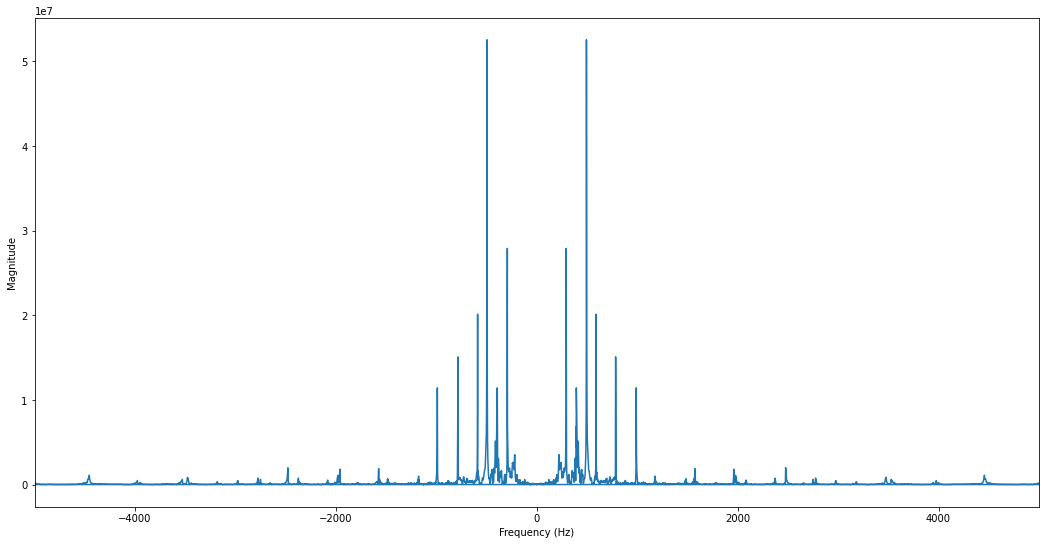

In [304]:
plt.figure(figsize=(18,9))
plt.xlim(-5000, 5000)
plt.plot(freqs, mag_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [290]:
Audio(audio, rate=fs)

In [223]:
k0 = np.argmax(mag_spectrum)
f0 = freqs[k0]

print("k0:", k0)
print("f0:", f0)

k0: 235689
f0: -442.8893649193548


In [159]:
_filter = mag_spectrum > sorted(mag_spectrum)[-3]
new_audio = np.fft.ifft(audio * _filter).real

# new_audio = np.sin(2 * np.pi * f0 * t)
Audio(new_audio, rate=rate)

The original sound you could tell there were lots of chords and nuanced sounds in the background. The new signal is very crisp and only plays the frequency f0.

We can see that a few frequencies really dominate the others. Which are they? Let's pick an arbitrary threshold and inspect the five biggest amplitudes.

In [294]:
largest_freqs = np.unique(freqs[np.where(mag_spectrum > 1e8)].real.astype(np.int16))
largest_freqs = largest_freqs[largest_freqs > 0]
largest_freqs

array([ 442,  668, 1328, 1329, 1571], dtype=int16)

### <span style="color:red"> Exercise 3 </span>

Keep the five most dominant frequencies from [melodica_recording.wav](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/signal_analysis/melodica_recording.wav) and remove the rest. Plot its DFT and play the modified signal.

In [299]:
key = dict(zip(freqs.astype(np.int16), mag_spectrum))
largest_magnitudes.min()

2952234.781683988

In [302]:
largest_magnitudes = np.zeros(5)
for i, freq in enumerate(largest_freqs):
    largest_magnitudes[i] = key[freq]
    
dft[np.where(mag_spectrum < largest_magnitudes.min())] = 0

new_audio = np.fft.ifft(dft).real.astype(np.int16)

dft_modified = np.fft.fft(new_audio)
magnitudes_modified = np.abs(dft_modified)
freqs = np.fft.fftfreq(len(new_audio), 1 / fs)
indices = np.argsort(freqs)

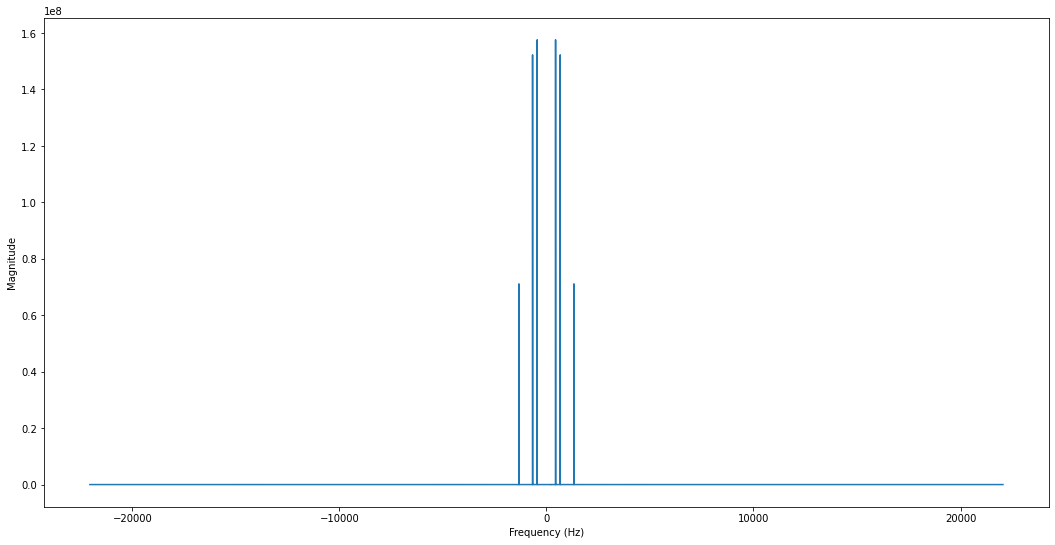

In [288]:
plt.figure(figsize=(18,9))
plt.plot(freqs[indices], magnitudes_modified[indices])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [289]:
Audio(new_audio, rate=44100)

### <span style="color:red"> Exercise 4 </span>

Load up a recording of the ukulele, [uke_recording.wav](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/signal_analysis/uke_recording.wav).
- What are the dominant frequencies in this recording?
- Remove frequencies with magnitude less than 500 from the recording.
- Play the new sound and plot its DFT.
- How does the new sound compare to the original?

In [303]:
fs, audio = wav.read("uke_recording.wav")
dft = np.fft.fft(audio)
freqs = np.fft.fftfreq(len(audio), 1/fs)
mag_spectrum = np.abs(dft)

Audio(audio, rate=fs)

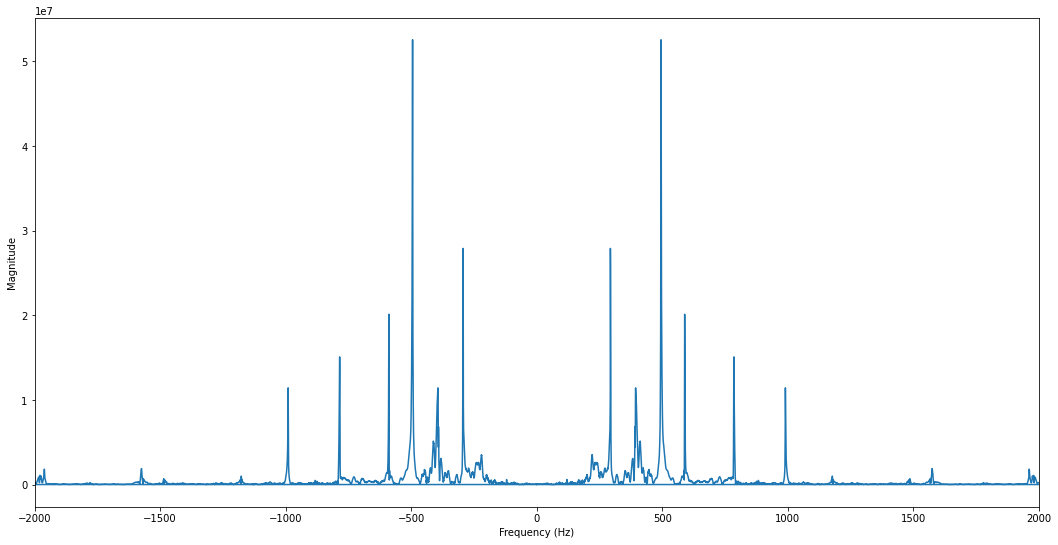

In [308]:
plt.figure(figsize=(18,9))
plt.plot(freqs, mag_spectrum)
plt.xlim(-2000, 2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [309]:
largest_freqs = np.unique(freqs[np.where(mag_spectrum > 1e7)].real.astype(np.int16))
largest_freqs = largest_freqs[largest_freqs > 0]
largest_freqs

array([292, 293, 294, 393, 394, 395, 492, 493, 494, 495, 496, 497, 498,
       499, 588, 589, 784, 785, 786, 990], dtype=int16)

In [313]:
dft[np.where(mag_spectrum < 500)] = 0

new_audio = np.fft.ifft(dft).real.astype(np.int16)

dft_modified = np.fft.fft(new_audio)
magnitudes_modified = np.abs(dft_modified)
freqs = np.fft.fftfreq(len(new_audio), 1 / fs)
indices = np.argsort(freqs)

In [314]:
Audio(new_audio, rate=fs)

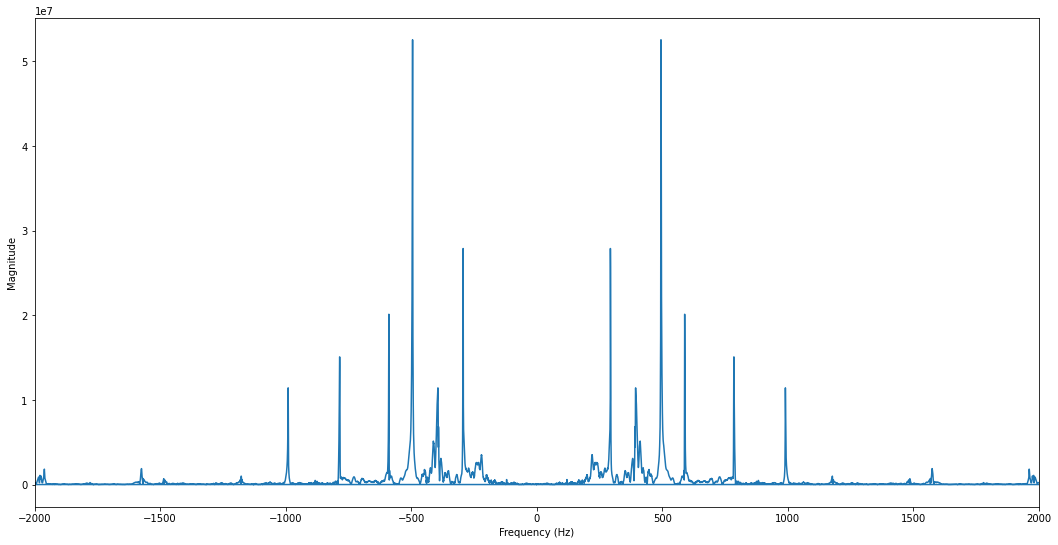

In [315]:
plt.figure(figsize=(18,9))
plt.plot(freqs, magnitudes_modified)
plt.xlim(-2000, 2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

The new sound is basically the same as the old one.

### <span style="color:red"> Exercise 5 </span>

- Use the voice recorder code from week 8 to record any song for a duration of 2 seconds.
- Suppress the background noise in the recording.
- Plot the amplitude and dft of the signals before and after denoising.
- Play the modified signal.

In [347]:
#!/usr/bin/env python

"""voice_recorder.py: As the name indicates, this code is used to record audio"""

__author__      = "Adharsh Sabukumar"



import pyaudio
import wave


chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 2
OUTPUT_FILE_NAME = "aidan_voice_clip.wav"

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)

frames = list()

print("*************************************")
print("*******   recording started   *******")

for i in range(0, RATE//chunk * RECORD_SECONDS):

    frame = stream.read(chunk, exception_on_overflow = False)
    frames.append(frame)


print("******   recording completed   ******")
print("*************************************")


stream.stop_stream()
stream.close()
p.terminate()

print("----  saving audio as .wav file  ----")
print("*************************************")

file = wave.open(OUTPUT_FILE_NAME, 'wb')
file.setnchannels(CHANNELS)
file.setsampwidth(p.get_sample_size(FORMAT))
file.setframerate(RATE)
file.writeframes(b''.join(frames))
file.close()

*************************************
*******   recording started   *******
******   recording completed   ******
*************************************
----  saving audio as .wav file  ----
*************************************


In [376]:
fs, audio = wav.read("aidan_voice_clip.wav")
dft = np.fft.fft(audio)
freqs = np.fft.fftfreq(len(audio), 1/fs)
mag_spectrum = np.abs(dft)

Audio(audio, rate=fs)

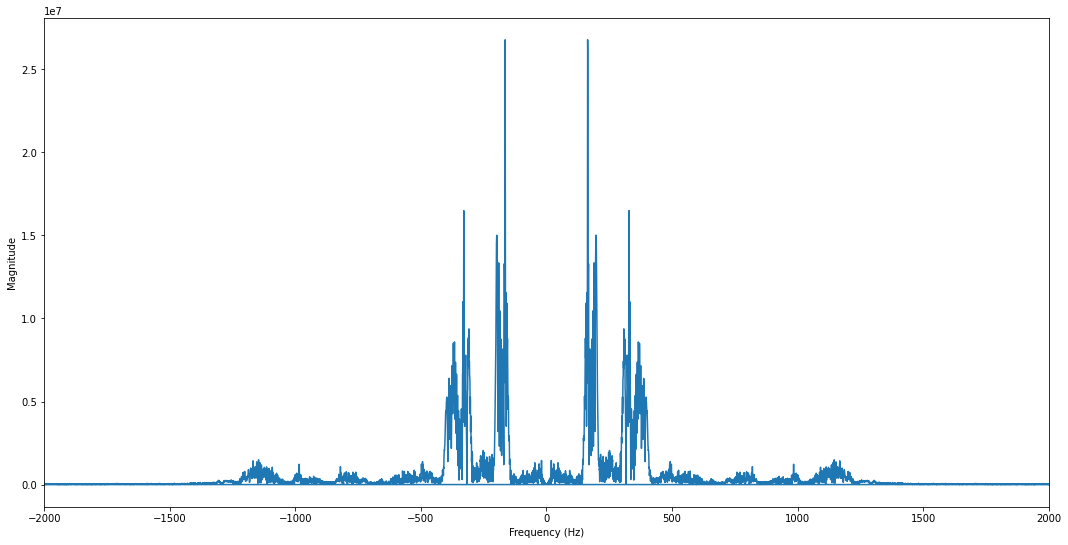

In [377]:
plt.figure(figsize=(18,9))
plt.plot(freqs, mag_spectrum)
plt.xlim(-2000, 2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [388]:
# largest_freqs = np.unique(freqs[np.where(mag_spectrum > 0.8e7)].real.astype(np.int16))
# largest_freqs = largest_freqs[largest_freqs > 0]

new_dft = np.copy(dft)
new_dft[np.where(mag_spectrum < 50000)] = 0

new_audio = np.fft.ifft(new_dft).real.astype(np.int16)

dft_modified = np.fft.fft(new_audio)
magnitudes_modified = np.abs(dft_modified)
new_freqs = np.fft.fftfreq(len(new_audio), 1 / fs)
indices = np.argsort(new_freqs)

Audio(new_audio, rate=fs)

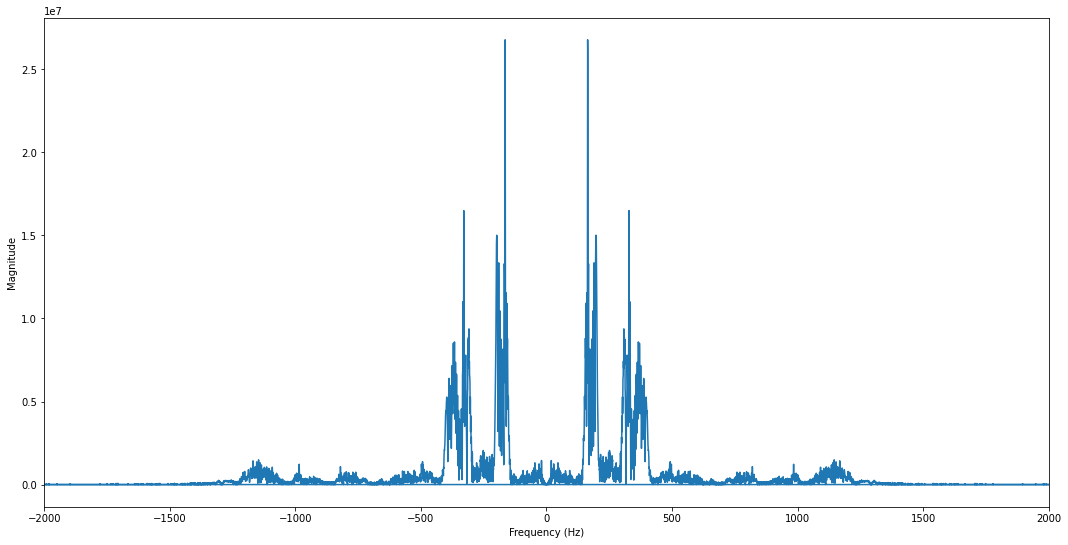

In [389]:
plt.figure(figsize=(18,9))
plt.plot(new_freqs, magnitudes_modified)
plt.xlim(-2000, 2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

### <span style="color:red"> Exercise 6 </span>

- Modify the voice changer from week 8 to save the original and modified voice.
- Plot the amplitude and dft of both the signals.
- Comment on the difference between the plots.
- List the complete code here in a seperate code block.

In [397]:
#!/usr/bin/env python

"""voice_recorder.py: As the name indicates, this code is used to record audio"""

__author__      = "Adharsh Sabukumar"



import pyaudio
import wave
import numpy as np


chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 2
OUTPUT_FILE_NAME = "original_voice_clip.wav"
OUTPUT_FILE_NAME_2 = "modified_voice_clip.wav"

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)

frames = list()

print("*************************************")
print("*******   recording started   *******")

for i in range(0, RATE//chunk * RECORD_SECONDS):

    frame = stream.read(chunk, exception_on_overflow = False)
    frames.append(frame)


print("******   recording completed   ******")
print("*************************************")


stream.stop_stream()
stream.close()
p.terminate()

audio = np.frombuffer(b''.join(frames), dtype=np.int16)
dft = np.fft.fft(audio)
freqs = np.fft.fftfreq(len(audio), 1/RATE)
mag_spectrum = np.abs(dft)

dft[np.where(mag_spectrum < 1000)] = 0
new_audio = np.fft.ifft(dft).real.astype(np.int16)

print("----  saving audio as .wav file  ----")
print("*************************************")

file = wave.open(OUTPUT_FILE_NAME, 'wb')
file.setnchannels(CHANNELS)
file.setsampwidth(p.get_sample_size(FORMAT))
file.setframerate(RATE)
file.writeframes(b''.join(frames))
file.close()

file = wave.open(OUTPUT_FILE_NAME_2, 'wb')
file.setnchannels(CHANNELS)
file.setsampwidth(p.get_sample_size(FORMAT))
file.setframerate(RATE)
file.writeframes(new_audio.tobytes())
file.close()

print("==============  DONE  ===============")

*************************************
*******   recording started   *******
******   recording completed   ******
*************************************
----  saving audio as .wav file  ----
*************************************
==============  DONE  ===============


## <span style="color:green;"> Reflection </span>

Do not skip this section! Assignment will be graded only on completing this section.

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I think I was able to visualize the DFT process through plots of the signals pretty well
2. I learned how signals change due to performing filtering operations on them based off their DFT results.
3. For me no, I just had some trouble finding the right code to use.
4. N/A